In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_decision_regions
from mlxtend.classifier import Adaline

## Importing data and numerically encoding the target variable

In [2]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",header=None)

In [3]:
data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
#converting the string labels into numeric labels so that is it compatible with sci-kit learn

label_encoder = LabelEncoder()
data[4]=label_encoder.fit_transform(data.iloc[0:150, 4].values)
print(data.head())

     0    1    2    3  4
0  5.1  3.5  1.4  0.2  0
1  4.9  3.0  1.4  0.2  0
2  4.7  3.2  1.3  0.2  0
3  4.6  3.1  1.5  0.2  0
4  5.0  3.6  1.4  0.2  0



---

## Using 2 features & Linearly Seperable Classes

In [5]:
#extracting data points for setosa and virginica

X1 = data.iloc[0:50, [1, 3]]
X2 = data.iloc[100:150, [1, 3]]
X=pd.concat([X1, X2], axis=0,ignore_index=True)

Y1 = data.iloc[0:50, 4]
Y2 = data.iloc[100:150, 4]
y=pd.concat([Y1, Y2], axis=0,ignore_index=True)

#changing 2nd class (virginica) labels from 2 to 1 to fit the function definition

for i in range(0,100):
    if y[i]==2:
        y[i]=1


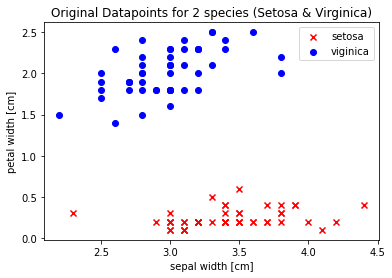

In [6]:
#plotting the extracted data points

plt.scatter(X.iloc[0:50, 0], X.iloc[0:50, 1], color='red', marker='x', label='setosa')

plt.scatter(X.iloc[50:100, 0], X.iloc[50:100, 1],
            color='blue', marker='o', label='viginica')

#labelling the plot
plt.title('Original Datapoints for 2 species (Setosa & Virginica)')
plt.xlabel('sepal width [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper right')

In [7]:
#training the perceptron

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train=X_train.to_numpy()
y_train=y_train.to_numpy()
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()

#standardizing the training set
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

#fitting the perceptron
ppn=Perceptron(max_iter = 20, eta0 = 0.1, random_state = 0)
ppn.fit(X_train,y_train)

Perceptron(eta0=0.1, max_iter=20)

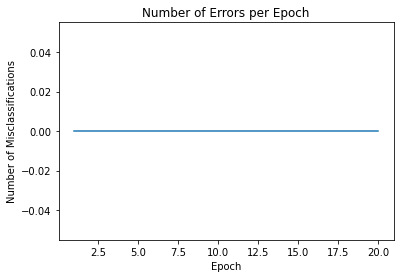

In [8]:
#plotting errors per epoch

errors_per_epoch = []
for epoch in range(1, 21):
    ppn.fit(X, y)
    y_pred = ppn.predict(X)
    misclassified = (y != y_pred).sum()
    errors_per_epoch.append(misclassified)
plt.plot(range(1, 21), errors_per_epoch, marker='')
plt.xlabel('Epoch')
plt.ylabel('Number of Misclassifications')
plt.title('Number of Errors per Epoch')
plt.show()

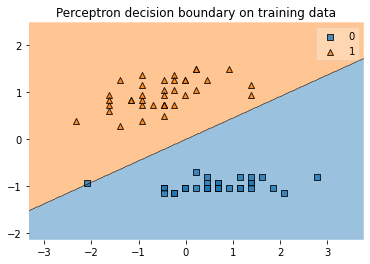

In [9]:
#plotting the training data points along with the decision boundary

plot_decision_regions(X_train, y_train, clf=ppn)
plt.title('Perceptron decision boundary on training data')
plt.show()

Accuracy: 100.00%


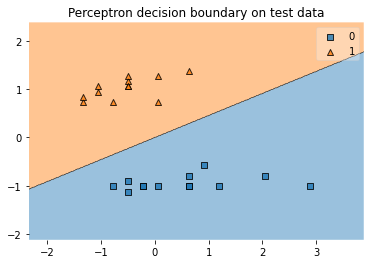

In [10]:
#accuracy and plot on test data
y_pred=ppn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

plot_decision_regions(X_test, y_test, clf=ppn)
plt.title('Perceptron decision boundary on test data')
plt.show()

Iteration: 20/20 | Cost 1.54 | Elapsed: 0:00:00 | ETA: 0:00:000

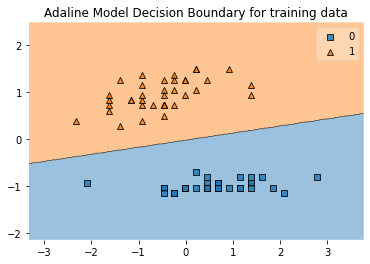

Text(0, 0.5, 'Cost')

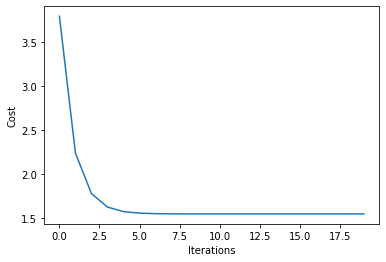

In [11]:
#Adaline Model

ada = Adaline(epochs=20, 
              eta=0.01, 
              minibatches=1, # for Gradient Descent Learning
              random_seed=1,
              print_progress=3)

ada.fit(X_train, y_train)
plot_decision_regions(X_train, y_train, clf=ada)
plt.title('Adaline Model Decision Boundary for training data')
plt.show()

plt.plot(range(len(ada.cost_)), ada.cost_)
plt.xlabel('Iterations')
plt.ylabel('Cost')

Accuracy: 100.00%


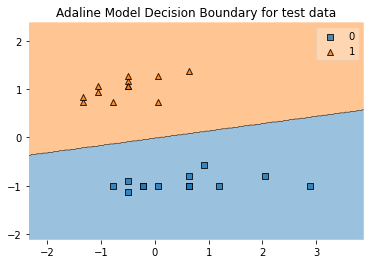

In [12]:
#accuracy and plot on test data
y_pred=ada.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

plot_decision_regions(X_test, y_test, clf=ada)
plt.title('Adaline Model Decision Boundary for test data')
plt.show()

### Comparing the accuracies & decision boundaries of Perceptron and Adaline using 2 features
##### Perceptron on test data - Accuracy = 100%
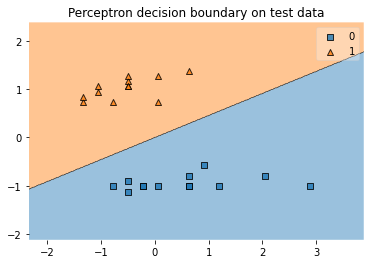
##### Adaline Model on test data - Accuracy = 100% at learning rate = 0.01, cost = 1.54
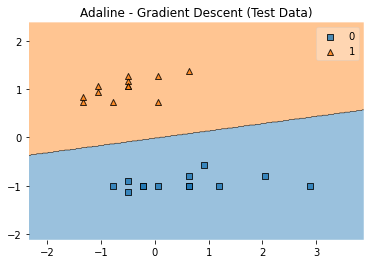


---

## Using 3 features & Linearly Seperable Classes


In [13]:
#petal width, sepal length, sepal width
X1 = data.iloc[0:50, 1:4]
X2 = data.iloc[100:150, 1:4]
X=pd.concat([X1, X2], axis=0,ignore_index=True)
print(X)
Y1 = data.iloc[0:50, 4]
Y2 = data.iloc[100:150, 4]
y=pd.concat([Y1, Y2], axis=0,ignore_index=True)

#changing 2nd class (virginica) labels from 2 to 1 to fit the function definition

for i in range(0,100):
    if y[i]==2:
        y[i]=1

      1    2    3
0   3.5  1.4  0.2
1   3.0  1.4  0.2
2   3.2  1.3  0.2
3   3.1  1.5  0.2
4   3.6  1.4  0.2
..  ...  ...  ...
95  3.0  5.2  2.3
96  2.5  5.0  1.9
97  3.0  5.2  2.0
98  3.4  5.4  2.3
99  3.0  5.1  1.8

[100 rows x 3 columns]


In [14]:
#Perceptron
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
ppn=Perceptron(max_iter = 20, eta0 = 0.1, random_state = 0)
ppn.fit(X_train,y_train)
y_pred=ppn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


Iteration: 20/20 | Cost 0.89 | Elapsed: 0:00:00 | ETA: 0:00:0000

Accuracy: 100.00%


Text(0, 0.5, 'Cost')

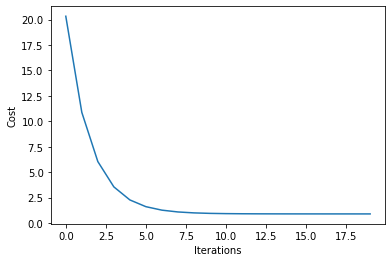

In [15]:
#Adaline

#converting pandas dataframe to numpy array to fit the function definition
X_train=X_train.to_numpy()
y_train=y_train.to_numpy()
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()

#standardizing the training set
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

ada = Adaline(epochs=20, 
              eta=0.01, 
              minibatches=1, # for Gradient Descent Learning
              random_seed=1,
              print_progress=3)

ada.fit(X_train, y_train)
y_pred=ada.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
plt.plot(range(len(ada.cost_)), ada.cost_)
plt.xlabel('Iterations')
plt.ylabel('Cost')

### Comparing the Accuracies of Perceptron and Adaline using 3 features
##### Perceptron on test data - Accuracy = 100%
##### Adaline Model on test data - Accuracy = 100% at learning rate = 0.01, cost = 0.89



---

## Using all 4 features & Linearly Seperable Classes

In [16]:
X1 = data.iloc[0:50, 0:4]
X2 = data.iloc[100:150, 0:4]
X=pd.concat([X1, X2], axis=0,ignore_index=True)
print(X)
Y1 = data.iloc[0:50, 4]
Y2 = data.iloc[100:150, 4]
y=pd.concat([Y1, Y2], axis=0,ignore_index=True)

#changing 2nd class (virginica) labels from 2 to 1 to fit the function definition

for i in range(0,100):
    if y[i]==2:
        y[i]=1

      0    1    2    3
0   5.1  3.5  1.4  0.2
1   4.9  3.0  1.4  0.2
2   4.7  3.2  1.3  0.2
3   4.6  3.1  1.5  0.2
4   5.0  3.6  1.4  0.2
..  ...  ...  ...  ...
95  6.7  3.0  5.2  2.3
96  6.3  2.5  5.0  1.9
97  6.5  3.0  5.2  2.0
98  6.2  3.4  5.4  2.3
99  5.9  3.0  5.1  1.8

[100 rows x 4 columns]


In [17]:
#Perceptron
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
ppn=Perceptron(max_iter = 20, eta0 = 0.1, random_state = 0)
ppn.fit(X_train,y_train)
y_pred=ppn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


Iteration: 20/20 | Cost 0.94 | Elapsed: 0:00:00 | ETA: 0:00:0000

Accuracy: 100.00%


Text(0, 0.5, 'Cost')

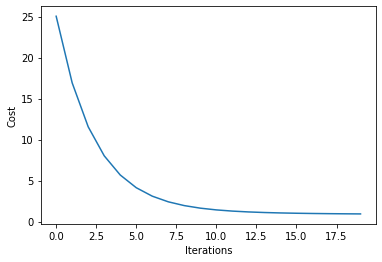

In [18]:
#Adaline
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#converting pandas dataframe to numpy array to fit the function definition
X_train=X_train.to_numpy()
y_train=y_train.to_numpy()
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()

#standardizing the training set
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

ada = Adaline(epochs=20, 
              eta=0.008, 
              minibatches=1, # for Gradient Descent Learning
              random_seed=1,
              print_progress=3)

ada.fit(X_train, y_train)
y_pred=ada.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
plt.plot(range(len(ada.cost_)), ada.cost_)
plt.xlabel('Iterations')
plt.ylabel('Cost')

### Comparing the Accuracies of Perceptron and Adaline using 3 features
##### Perceptron on test data - Accuracy = 100%
##### Adaline Model on test data - Accuracy = 100% at learning rate = 0.008, cost = 0.94



---

## Using 2 features & Linearly Inseperable Classes

In [19]:
#extracting data points for versicolor and virginica (petal length and sepal length)

X1 = data.iloc[50:100, [0, 2]]
X2 = data.iloc[100:150, [0, 2]]
X=pd.concat([X1, X2], axis=0,ignore_index=True)

Y1 = data.iloc[0:50, 4]
Y2 = data.iloc[100:150, 4]
y=pd.concat([Y1, Y2], axis=0,ignore_index=True)

#changing 2nd class (virginica) labels from 2 to 1 to fit the function definition

for i in range(0,100):
    if y[i]==1:
        y[i]=0
for i in range(0,100):
    if y[i]==2:
        y[i]=1

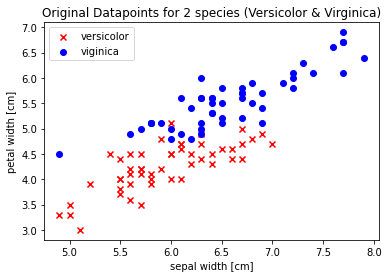

In [20]:
#plotting the extracted data points

plt.scatter(X.iloc[0:50, 0], X.iloc[0:50, 1], color='red', marker='x', label='versicolor')

plt.scatter(X.iloc[50:100, 0], X.iloc[50:100, 1],
            color='blue', marker='o', label='viginica')

#labelling the data
plt.title('Original Datapoints for 2 species (Versicolor & Virginica)')
plt.xlabel('sepal width [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')

In [21]:
#training the perceptron

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train=X_train.to_numpy()
y_train=y_train.to_numpy()
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()

#standardizing the training set
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

#fitting the perceptron
ppn=Perceptron(max_iter = 100, eta0 = 0.1, random_state = 0)
ppn.fit(X_train,y_train)

Perceptron(eta0=0.1, max_iter=100)

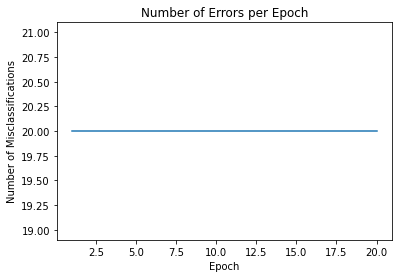

In [22]:
#plotting errors per epoch

errors_per_epoch = []
for epoch in range(1, 21):
    ppn.fit(X, y)
    y_pred = ppn.predict(X)
    misclassified = (y != y_pred).sum()
    errors_per_epoch.append(misclassified)
plt.plot(range(1, 21), errors_per_epoch, marker='')
plt.xlabel('Epoch')
plt.ylabel('Number of Misclassifications')
plt.title('Number of Errors per Epoch')
plt.show()

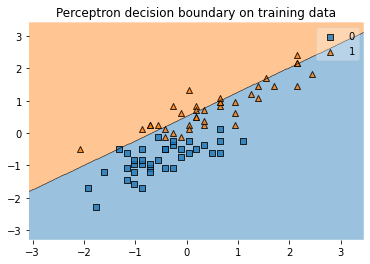

In [23]:
#plotting the data points along with the decision boundary

plot_decision_regions(X_train, y_train, clf=ppn)
plt.title('Perceptron decision boundary on training data')
plt.show()

Accuracy: 80.00%


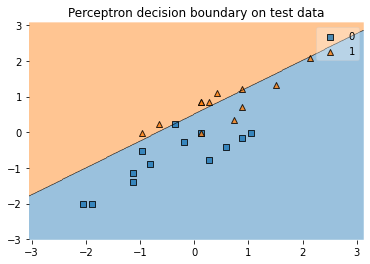

In [24]:
y_pred=ppn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

plot_decision_regions(X_test, y_test, clf=ppn)
plt.title('Perceptron decision boundary on test data')
plt.show()

Iteration: 40/40 | Cost 10.87 | Elapsed: 0:00:00 | ETA: 0:00:000

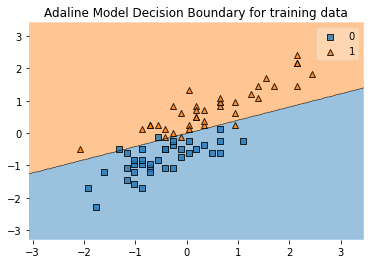

Text(0, 0.5, 'Cost')

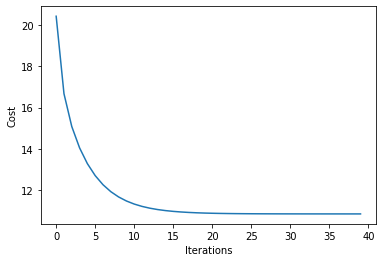

In [25]:
#Adaline
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#converting pandas dataframe to numpy array to fit the function definition
X_train=X_train.to_numpy()
y_train=y_train.to_numpy()
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()

#standardizing the training set
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

ada = Adaline(epochs=40, 
              eta=0.01, 
              minibatches=1, # for Gradient Descent Learning
              random_seed=1,
              print_progress=3)

ada.fit(X_train, y_train)
plot_decision_regions(X_train, y_train, clf=ada)
plt.title('Adaline Model Decision Boundary for training data')
plt.show()

plt.plot(range(len(ada.cost_)), ada.cost_)
plt.xlabel('Iterations')
plt.ylabel('Cost')


Accuracy: 92.00%


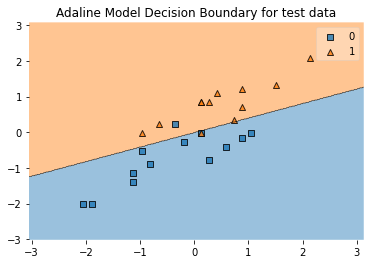

In [26]:
y_pred=ada.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

plot_decision_regions(X_test, y_test, clf=ada)
plt.title('Adaline Model Decision Boundary for test data')
plt.show()

### Comparing the accuracies & decision boundaries of Perceptron and Adaline using 2 features (linearly inseperable)
##### Perceptron on test data - Accuracy = 80%
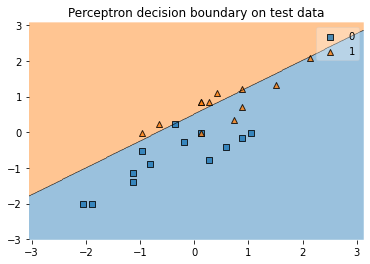
##### Adaline Model on test data - Accuracy = 92% at learning rate = 0.01, cost = 10.87
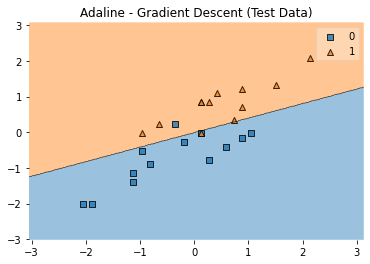


---

## Using 3 features & Linearly Inseperable Classes


In [27]:
#petal length, petal width, sepal length
X1 = data.iloc[50:100, 0:3]
X2 = data.iloc[100:150, 0:3]
X=pd.concat([X1, X2], axis=0,ignore_index=True)
print(X)
Y1 = data.iloc[50:100, 4]
Y2 = data.iloc[100:150, 4]
y=pd.concat([Y1, Y2], axis=0,ignore_index=True)

#changing 2nd class (virginica) labels from 2 to 1 to fit the function definition

for i in range(0,100):
    if y[i]==1:
        y[i]=0
for i in range(0,100):
    if y[i]==2:
        y[i]=1

      0    1    2
0   7.0  3.2  4.7
1   6.4  3.2  4.5
2   6.9  3.1  4.9
3   5.5  2.3  4.0
4   6.5  2.8  4.6
..  ...  ...  ...
95  6.7  3.0  5.2
96  6.3  2.5  5.0
97  6.5  3.0  5.2
98  6.2  3.4  5.4
99  5.9  3.0  5.1

[100 rows x 3 columns]


In [28]:
#Perceptron
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
ppn=Perceptron(max_iter = 100, eta0 = 0.1, random_state = 0)
ppn.fit(X_train,y_train)
y_pred=ppn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 84.00%


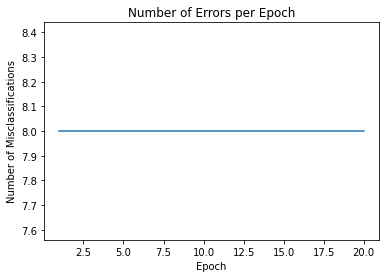

In [29]:
#plotting errors per epoch

errors_per_epoch = []
for epoch in range(1, 21):
    ppn.fit(X, y)
    y_pred = ppn.predict(X)
    misclassified = (y != y_pred).sum()
    errors_per_epoch.append(misclassified)
plt.plot(range(1, 21), errors_per_epoch, marker='')
plt.xlabel('Epoch')
plt.ylabel('Number of Misclassifications')
plt.title('Number of Errors per Epoch')
plt.show()

Iteration: 50/50 | Cost 10.72 | Elapsed: 0:00:00 | ETA: 0:00:000

Accuracy: 88.00%


Text(0, 0.5, 'Cost')

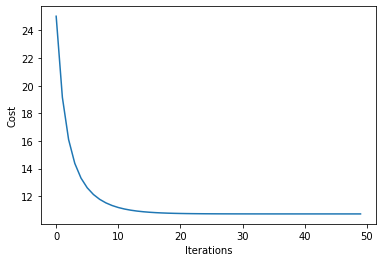

In [30]:
#Adaline
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#converting pandas dataframe to numpy array to fit the function definition
X_train=X_train.to_numpy()
y_train=y_train.to_numpy()
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()

#standardizing the training set
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

ada = Adaline(epochs=50, 
              eta=0.01, 
              minibatches=1, # for Gradient Descent Learning
              random_seed=1,
              print_progress=3)

ada.fit(X_train, y_train)
y_pred=ada.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
plt.plot(range(len(ada.cost_)), ada.cost_)
plt.xlabel('Iterations')
plt.ylabel('Cost')

### Comparing the Accuracies of Perceptron and Adaline using 3 features (linearly inseperable)
##### Perceptron on test data - Accuracy = 84%
##### Adaline Model on test data - Accuracy = 88% at learning rate = 0.01, cost = 10.72



---

## Using all 4 features & Linearly Inseperable Classes


In [31]:
#petal length, petal width, sepal length
X1 = data.iloc[50:100, 0:4]
X2 = data.iloc[100:150, 0:4]
X=pd.concat([X1, X2], axis=0,ignore_index=True)
print(X)
Y1 = data.iloc[50:100, 4]
Y2 = data.iloc[100:150, 4]
y=pd.concat([Y1, Y2], axis=0,ignore_index=True)

#changing 2nd class (virginica) labels from 2 to 1 to fit the function definition

for i in range(0,100):
    if y[i]==1:
        y[i]=0
for i in range(0,100):
    if y[i]==2:
        y[i]=1

      0    1    2    3
0   7.0  3.2  4.7  1.4
1   6.4  3.2  4.5  1.5
2   6.9  3.1  4.9  1.5
3   5.5  2.3  4.0  1.3
4   6.5  2.8  4.6  1.5
..  ...  ...  ...  ...
95  6.7  3.0  5.2  2.3
96  6.3  2.5  5.0  1.9
97  6.5  3.0  5.2  2.0
98  6.2  3.4  5.4  2.3
99  5.9  3.0  5.1  1.8

[100 rows x 4 columns]


In [32]:
#Perceptron
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
ppn=Perceptron(max_iter = 100, eta0 = 0.1, random_state = 0)
ppn.fit(X_train,y_train)
y_pred=ppn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 92.00%


Iteration: 50/50 | Cost 8.08 | Elapsed: 0:00:00 | ETA: 0:00:0000

Accuracy: 96.00%


Text(0, 0.5, 'Cost')

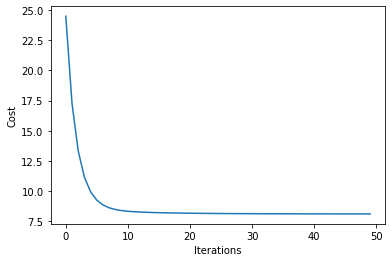

In [33]:
#Adaline
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#converting pandas dataframe to numpy array to fit the function definition
X_train=X_train.to_numpy()
y_train=y_train.to_numpy()
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()

#standardizing the training set
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

ada = Adaline(epochs=50, 
              eta=0.008, 
              minibatches=1, # for Gradient Descent Learning
              random_seed=1,
              print_progress=3)

ada.fit(X_train, y_train)
y_pred=ada.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
plt.plot(range(len(ada.cost_)), ada.cost_)
plt.xlabel('Iterations')
plt.ylabel('Cost')

### Comparing the Accuracies of Perceptron and Adaline using all 4 features (linearly inseperable)
##### Perceptron on test data - Accuracy = 92%
##### Adaline Model on test data - Accuracy = 96% at learning rate = 0.008, cost = 8.08



---

## Result Summary

### Linearly Seperable data

| No. of Features    | Perceptron Accuracy | Adaline Accuracy |
| ------------------ | ------------------- | ---------------- |
|         2          |          100%       |         100%     |
|         3          |          100%       |         100%     |
|         4          |          100%       |         100%     |

### Linearly Inseperable data

| No. of Features    | Perceptron Accuracy | Adaline Accuracy |
| ------------------ | ------------------- | ---------------- |
|         2          |         80%         |        92%       |
|         3          |         84%         |        88%       |
|         4          |         92%         |        96%       |